In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [15]:
df = df.iloc[:,:2]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
# df.dropna(how='any', axis=1)
# df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

In [18]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['v3'] = encoder.fit_transform(df['v1'])
df  

,v1,v2,v3
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [22]:
# df['v1'] = df['v1'].replace(['ham', 'spam'], [0,1])

In [23]:
len(np.unique(df['v2']))

5169

In [25]:
df['v2'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [28]:
# 중복값 삭제
df.drop_duplicates(subset=['v2'],inplace=True)
len(df)

5169

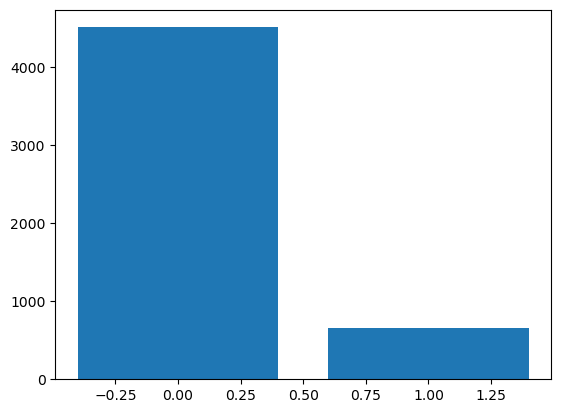

In [33]:
plt.bar([0,1], df['v1'].value_counts())
plt.show()

In [34]:
df['v1'].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

In [90]:
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v3'],
                                                   test_size = 0.2,
                                                   random_state = 1,
                                                   stratify = df['v1']) 
# stratify는 train과 test가 어느 한쪽으로 쏠리지 않게 비율을 유지시켜주는 옵션

In [91]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded[0])

[9, 39, 1834, 20, 80, 1518, 359, 156, 227, 143, 499, 1834, 20, 80, 1835, 1518]


In [92]:
word_to_index = tokenizer.index_word
# print(word_to_index)
strings = []
for i in X_train_encoded[0]:
    strings.append(word_to_index[i])
strings

['is',
 'ur',
 'changes',
 '2',
 'da',
 'report',
 'big',
 'cos',
 "i've",
 'already',
 'made',
 'changes',
 '2',
 'da',
 'previous',
 'report']

In [93]:
## 단어의 빈도수
threshold = 2 # 최소 빈도
total_cnt = len(word_to_index)
rare_cnt = 0 #등장 빈도가 threshold보다 작은 단어 개수
total_freq = 0 # 훈련데이터셋의 전체단어빈도수의 총합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총합

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if value < threshold:
        rare_cnt += 1
        rare_freq += value
print(f'등장 빈도가 {threshold}보다 작은 단어의 갯수 :', rare_cnt)
print('총 단어집합에서 희귀단어의 비율 :', round((rare_cnt / total_cnt) * 100, 2))
print('전체 등장 빈도에서 희귀단어의 등장 비율 :', round((rare_freq / total_freq) * 100, 2))

등장 빈도가 2보다 작은 단어의 갯수 : 4428
총 단어집합에서 희귀단어의 비율 : 55.78
전체 등장 빈도에서 희귀단어의 등장 비율 : 6.81


In [94]:
tokenizer.word_counts.items()

odict_items([('is', 648), ('ur', 255), ('changes', 3), ('2', 375), ('da', 119), ('report', 4), ('big', 26), ('cos', 66), ("i've", 43), ('already', 72), ('made', 19), ('previous', 3), ('total', 2), ('video', 23), ('converter', 1), ('free', 201), ('download', 12), ('type', 9), ('this', 254), ('in', 654), ('google', 4), ('search', 5), ('i', 1806), ('canåõt', 1), ('wait', 54), ('for', 521), ('cornwall', 3), ('hope', 82), ('tonight', 47), ('isnåõt', 1), ('too', 90), ('bad', 29), ('as', 129), ('well', 87), ('but', 345), ('itåõs', 2), ('rock', 9), ('night', 89), ('shite', 1), ('anyway', 25), ('iåõm', 4), ('going', 139), ('a', 1033), ('kip', 1), ('now', 363), ('have', 429), ('good', 191), ('speak', 22), ('to', 1662), ('you', 1643), ('soon', 53), ('sen', 3), ('told', 41), ('that', 386), ('he', 166), ('join', 20), ('his', 48), ('uncle', 11), ('finance', 1), ('cbe', 5), ('can', 314), ('ask', 72), ('around', 49), ("there's", 21), ('not', 340), ('lot', 29), ('terms', 7), ('of', 464), ('mids', 2), (

In [95]:
vocab_size = len(word_to_index) + 1

In [96]:
tokenizer.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'can': 27,
 'do': 28,
 'get': 29,
 'at': 30,
 'be': 31,
 "i'm": 32,
 'will': 33,
 'with': 34,
 'if': 35,
 'just': 36,
 'we': 37,
 'no': 38,
 'ur': 39,
 'this': 40,
 'up': 41,
 '4': 42,
 'when': 43,
 'how': 44,
 'go': 45,
 'from': 46,
 'ok': 47,
 'out': 48,
 'all': 49,
 'what': 50,
 'lt': 51,
 'gt': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'then': 56,
 'good': 57,
 'was': 58,
 'its': 59,
 'am': 60,
 'got': 61,
 'time': 62,
 'come': 63,
 'he': 64,
 'day': 65,
 'only': 66,
 'want': 67,
 'love': 68,
 'there': 69,
 'one': 70,
 'going': 71,
 'need': 72,
 'lor': 73,
 'text': 74,
 'send': 75,
 'as': 76,
 'by': 77,
 'see': 78,
 'home': 79,
 'da': 80,
 'about': 81,
 'txt': 82,
 'still': 83,
 'back': 84,
 'to

In [97]:
# 문자 최대 길이
max_len = 0
for i in range(len(X_train_encoded)):
    cnt = len(X_train_encoded[i]) # 각 메일의 문장 길이 확인
    if cnt > max_len:
        max_len = cnt
max_len        

189

In [98]:
# 문자 평균 길이
avg = 0
for i in range(len(X_train_encoded)):
    avg += len(X_train_encoded[i]) # 각 메일의 문장 길이 확인
avg / len(X_train_encoded) 

15.73397823458283

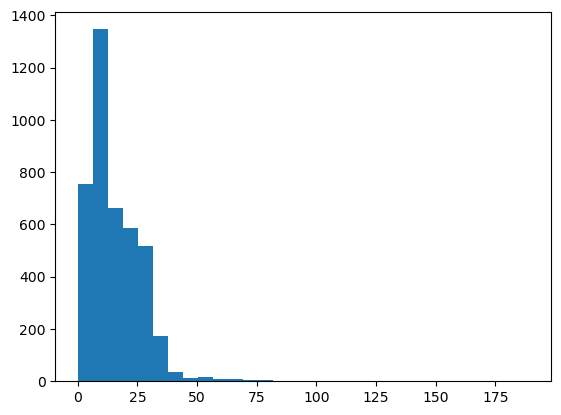

In [99]:
plt.hist([len(X) for X in X_train_encoded], bins=30)
plt.show()

In [100]:
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
X_train_padded.shape

(4135, 189)

In [101]:
X_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [104]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [105]:
y_train

4313    0
1505    0
4145    0
4779    0
3477    0
       ..
802     1
3941    0
2634    0
2728    1
1558    0
Name: v3, Length: 4135, dtype: int32

In [106]:
history = model.fit(X_train_padded, y_train, epochs = 20, batch_size = 64,
                   validation_split=0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8480 - loss: 0.4706 - val_accuracy: 0.9311 - val_loss: 0.2258
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9598 - loss: 0.1649 - val_accuracy: 0.9746 - val_loss: 0.0977
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9839 - loss: 0.0766 - val_accuracy: 0.9710 - val_loss: 0.0994
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9912 - loss: 0.0437 - val_accuracy: 0.9782 - val_loss: 0.0730
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9962 - loss: 0.0232 - val_accuracy: 0.9770 - val_loss: 0.0695
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9990 - loss: 0.0119 - val_accuracy: 0.9819 - val_loss: 0.0665
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9971 - loss: 0.0158 - val_accuracy: 0.9807 - val_loss: 0.0680
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9988 - loss: 0.0107 - val_accuracy: 0.9807 - v

In [107]:
vocab_size

7939

In [110]:
X_train_padded.shape

(4135, 189)

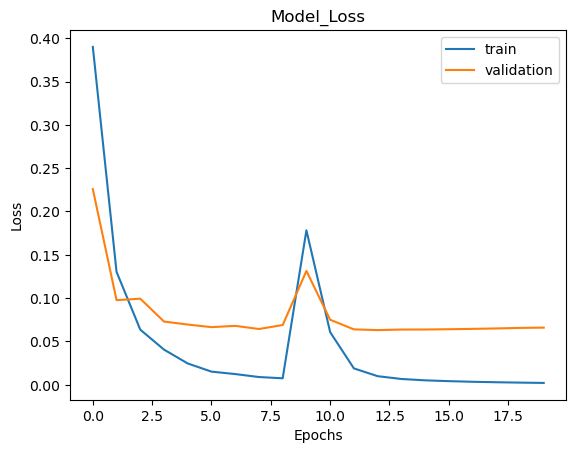

In [118]:
plt.plot(range(20), history.history['loss'], label='train')
plt.plot(range(20), history.history['val_loss'], label='validation')
plt.title('Model_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [120]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen=max_len)
model.evaluate(X_test_padded, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0623


[0.06584202498197556, 0.9864603281021118]

In [122]:
y_test
X_test[1662]

'Hi if ur lookin 4 saucy daytime fun wiv busty married woman Am free all next week Chat now 2 sort time 09099726429 JANINExx Callså£1/minMobsmoreLKPOBOX177HP51FL'

In [127]:
model.predict(X_test_padded[1031].reshape(1, -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


array([[0.8258363]], dtype=float32)

In [125]:
y_test.reset_index()

,index,v3
0,2500,0
1,2683,0
2,2127,0
3,1842,0
4,1945,0
...,...,...
1029,3457,0
1030,3712,0
1031,1662,1
1032,203,0


In [197]:
## 로이터 뉴스 데이터 분류 모델(LSTM)
# Many - to - Many 형태
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [131]:
(X_train, y_train) , (X_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [132]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8982,) (8982,)
(2246,) (2246,)


In [198]:
X_train # 여러 개의 값이 입력으로 들어갔다.
# 출력도 여러 개다
# Many-to-Many

array([[  0,   0,   0, ...,  15,  17,  12],
       [  0,   0,   0, ..., 505,  17,  12],
       [ 19, 758,  15, ...,  11,  17,  12],
       ...,
       [  0,   0,   0, ..., 407,  17,  12],
       [ 88,   2,  72, ..., 364,  17,  12],
       [125,   2,  21, ..., 113,  17,  12]])

In [140]:
max_len = 0
for i in range(len(X_train)):
    cnt = len(X_train[i])
    if cnt > max_len:
        max_len = cnt
max_len     

2376

In [141]:
y_train

array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

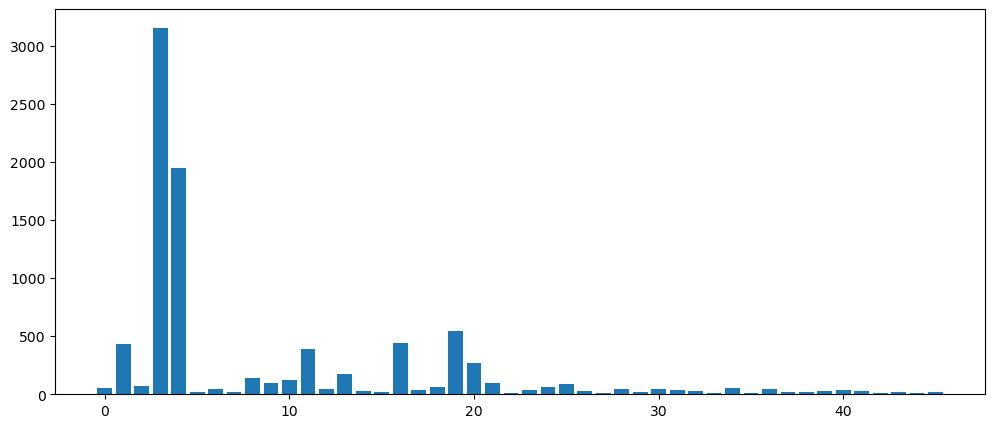

In [149]:
num_class = np.unique(y_train, return_counts=True)
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
plt.bar(num_class[0], num_class[1])
plt.show()

In [150]:
reuters.get_word_index()

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [155]:
word_to_index = reuters.get_word_index()

In [157]:
# reuters의 키와 벨류의 위치를 바꿔줌
index_to_word = {}
for k, v in word_to_index.items():
    index_to_word[v] = k
index_to_word

{10996: 'mdbl',
 16260: 'fawc',
 12089: 'degussa',
 8803: 'woods',
 13796: 'hanging',
 20672: 'localized',
 20673: 'sation',
 20675: 'chanthaburi',
 10997: 'refunding',
 8804: 'hermann',
 20676: 'passsengers',
 20677: 'stipulate',
 8352: 'heublein',
 20713: 'screaming',
 16261: 'tcby',
 185: 'four',
 1642: 'grains',
 20680: 'broiler',
 12090: 'wooden',
 1220: 'wednesday',
 13797: 'highveld',
 7593: 'duffour',
 20681: '0053',
 3914: 'elections',
 2563: '270',
 3551: '271',
 5113: '272',
 3552: '273',
 3400: '274',
 7975: 'rudman',
 3401: '276',
 3478: '277',
 3632: '278',
 4309: '279',
 9381: 'dormancy',
 7247: 'errors',
 3086: 'deferred',
 20683: 'sptnd',
 8805: 'cooking',
 20684: 'stratabit',
 16262: 'designing',
 20685: 'metalurgicos',
 13798: 'databank',
 20686: '300er',
 20687: 'shocks',
 7972: 'nawg',
 20688: 'tnta',
 20689: 'perforations',
 2891: 'affiliates',
 20690: '27p',
 16263: 'ching',
 595: 'china',
 16264: 'wagyu',
 3189: 'affiliated',
 16265: 'chino',
 16266: 'chinh',
 2

In [172]:
# print([index_to_word[t] for t in index_to_word])
print(" ".join([index_to_word[t] for t in index_to_word]))

mdbl fawc degussa woods hanging localized sation chanthaburi refunding hermann passsengers stipulate heublein screaming tcby four grains broiler wooden wednesday highveld duffour 0053 elections 270 271 272 273 274 rudman 276 277 278 279 dormancy errors deferred sptnd cooking stratabit designing metalurgicos databank 300er shocks nawg tnta perforations affiliates 27p ching china wagyu affiliated chino chinh slickline doldrums kids climbed controversy kidd spotty rebel millimetres golden projection stern hudson's dna dnc hodler lme insolvancy music therefore dns distortions thassos populations meteorologist loss exco adventist murchison locked kampala arndt nakasone steinweg india's wang wane unjust titanium want pinto institutes' absolute travel cutback nazmi modest shopwell sedi adoped tulis 18th wmc's menlo reiners farmlands nonsensical elisra welcomed peup holiday's activating avondale interational welcomes fip tailings fit lifeline bringing fix 624 naturalite wales fin fio ceremenon

In [173]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [174]:
(X_train, y_train) , (X_test, y_test) = reuters.load_data(num_words=1000, test_split=0.2)

In [175]:
X_train = pad_sequences(X_train, maxlen=100)
X_test = pad_sequences(X_test, maxlen=100)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [179]:
embedding_dim = 128
num_classes = 46

model = Sequential()
model.add(Embedding(1000, embedding_dim))
model.add(LSTM(128))
model.add(Dense(num_classes,activation='softmax')) # Dense 층
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [181]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best__model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [182]:
history = model.fit(X_train, y_train,
                   batch_size=36,
                   epochs=1000,
                   callbacks=[es, mc],
                   validation_data=(X_test, y_test))

Epoch 1/1000
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.3857 - loss: 2.5233
Epoch 1: val_acc improved from -inf to 0.52315, saving model to best__model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - acc: 0.3864 - loss: 2.5194 - val_acc: 0.5232 - val_loss: 1.9094
Epoch 2/1000
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.4870 - loss: 1.9346
Epoch 2: val_acc improved from 0.52315 to 0.56812, saving model to best__model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - acc: 0.4873 - loss: 1.9339 - val_acc: 0.5681 - val_loss: 1.7279
Epoch 3/1000
249/250 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.5617 - loss: 1.6905
Epoch 3: val_acc improved from 0.56812 to 0.58549, saving model to best__model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - acc: 0.5618 - loss: 1.6902 - val_acc: 0.5855 - val_loss: 1.6556
Epoch 4/1000
248/250 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.6004 - loss: 1.5547
Epoch 4: val_acc improved from 0.58549 to 0.60730, saving model to best__model.keras
25

In [185]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('best__model.keras')

In [186]:
loaded_model.evaluate(X_test, y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.7382 - loss: 1.1275


[1.1718612909317017, 0.7297417521476746]

In [191]:
pred = loaded_model.predict(X_test)
print(pred[0])

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
[4.7002814e-05 9.6965412e-04 4.3344794e-06 9.1614705e-01 4.5465723e-02
 2.5782378e-05 1.9278257e-05 8.4997795e-05 2.9265916e-03 9.0838563e-05
 3.7500364e-04 1.9270482e-03 2.8574126e-04 5.6483102e-04 1.9463823e-05
 1.5735393e-06 8.9872144e-03 2.5034542e-04 5.9304810e-05 6.3452260e-03
 1.2613021e-02 5.8829138e-04 3.4183488e-06 1.6555142e-04 4.4182987e-05
 1.7574293e-05 4.0927221e-06 2.6821859e-05 1.0353015e-05 3.2509145e-04
 1.8522621e-04 4.6261659e-05 3.8325903e-05 8.5214288e-06 2.1634971e-04
 7.6969911e-05 4.8439772e-04 7.1725749e-06 7.1635543e-05 3.2019854e-04
 6.0979088e-05 7.4932934e-05 1.2496237e-06 1.0716744e-05 3.9057366e-07
 1.2598102e-06]


In [196]:
i = 0
while True:
    i = input('값을 입력하세요.')
    if i == 'q':
        break
    i = int(i)
    print('예측값 : ', np.argmax(pred[i]), '예측 확률 : ', round(pred[i].max() * 100, 2)) 
    print('실제값 : ', np.argmax(y_test[i]))
    print('--------------------------------')

값을 입력하세요. 5


예측값 :  3 예측 확률 :  98.13
실제값 :  3
--------------------------------


값을 입력하세요. 8


예측값 :  3 예측 확률 :  98.1
실제값 :  3
--------------------------------


값을 입력하세요. 19


예측값 :  3 예측 확률 :  98.24
실제값 :  3
--------------------------------


값을 입력하세요. 45


예측값 :  4 예측 확률 :  99.32
실제값 :  4
--------------------------------


값을 입력하세요. 75


예측값 :  2 예측 확률 :  30.91
실제값 :  2
--------------------------------


값을 입력하세요. 22


예측값 :  3 예측 확률 :  98.13
실제값 :  3
--------------------------------


값을 입력하세요. 10


예측값 :  1 예측 확률 :  91.69
실제값 :  5
--------------------------------


값을 입력하세요. q


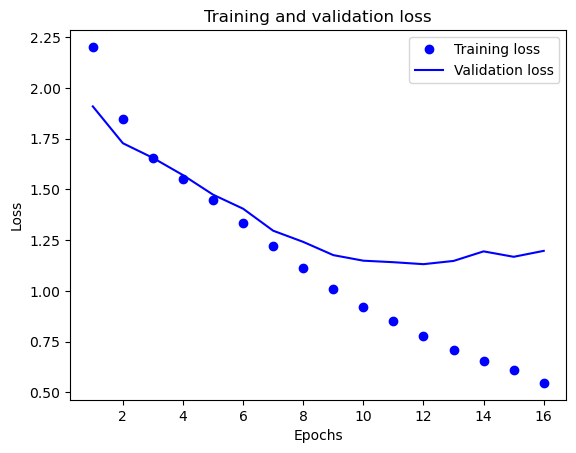

In [199]:
# 훈련 및 검증 손실 그래프
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [201]:
# 게임 리뷰 감성분석기
import pandas as pd
import numpy as np
from konlpy.tag import Okt
from sklearn.model_selection import train_test_split
from collections import Counter

In [207]:
df = pd.read_csv('steam.txt', sep='\t', names=['label', 'reviews'])
df.head()

,label,reviews
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요


In [208]:
df.drop_duplicates(subset=['reviews'], inplace=True)

In [209]:
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['label'],
                                                   test_size=0.3,
                                                   random_state=1)

In [210]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(69924,) (29968,)
(69924,) (29968,)


In [212]:
X_train

35579                                            너무 지루함 노잼
57475    와 진짜 개무섭네요 진짜루 ㄹㅇ루다가 깜짝 놀랐습니다;; 가격이 싸가지고 별로 그냥...
56284                                  퍼즐 + 보스레이드 + 짱짱한 배경
51737                         계속 클리어는 하는데 왜 주사위는 1에서 안올라감?
88515                         사셨다면 당장 환불하세요! 뭔 사람이 하나도 없냐;
                               ...                        
50089    2009년에 했으면 추천했을 게임 지금 하기엔 이미 더 나은 게임이 많아서 굳이 할...
98150    바이오하자드 1부터 꾸준히 재밌게, 심지어 5도 재밌게 플레이 했지만 이건 아닌거 ...
5192                                       요즘도 한번싞하는 갓겜입니다
77776                          친구들끼리 같이하면 개꿀잼게임!!!!!!!!!!!
98645    한국서버 터짐 한국서버 운영하는 회사가 돈들고 날랐으니, 이제 여기서 한글을 지원해...
Name: reviews, Length: 69924, dtype: object

In [217]:
# okt = Okt()
# tokened_train = X_train.apply(okt.nouns)

In [219]:
# tokened_train

In [218]:
# tokened_test = X_test.apply(okt.nouns)

In [216]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [220]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [225]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for k, v in tokenizer.word_counts.items():
    total_freq += v
    if v < threshold:
        rare_cnt += 1
        rare_freq += v

In [226]:
print(total_cnt)
print(rare_cnt)
print((rare_cnt / total_cnt) * 100)
print((rare_freq / total_freq) * 100)

188085
137360
73.03081053778877
18.2567319705468


In [227]:
vocab_size = total_cnt - rare_cnt + 1

In [228]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [229]:
X_train = pad_sequences(X_train, maxlen=60)
X_test = pad_sequences(X_test, maxlen=60)

In [231]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [233]:
embedding_dim = 128
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [234]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best__model.keras', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [235]:
history = model.fit(X_train, y_train,
                   epochs=100,
                   callbacks=[es, mc],
                   batch_size=128,
                   validation_data=[X_test, y_test])

Epoch 1/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - acc: 0.5718 - loss: 0.6708
Epoch 1: val_acc improved from -inf to 0.74019, saving model to best__model.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 69s 120ms/step - acc: 0.5719 - loss: 0.6707 - val_acc: 0.7402 - val_loss: 0.5139
Epoch 2/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - acc: 0.7698 - loss: 0.4781
Epoch 2: val_acc improved from 0.74019 to 0.76201, saving model to best__model.keras
547/547 ━━━━━━━━━━━━━━━━━━━━ 63s 114ms/step - acc: 0.7698 - loss: 0.4781 - val_acc: 0.7620 - val_loss: 0.4844
Epoch 3/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - acc: 0.8192 - loss: 0.4047
Epoch 3: val_acc did not improve from 0.76201
547/547 ━━━━━━━━━━━━━━━━━━━━ 66s 120ms/step - acc: 0.8192 - loss: 0.4047 - val_acc: 0.7587 - val_loss: 0.5081
Epoch 4/100
547/547 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - acc: 0.8418 - loss: 0.3602
Epoch 4: val_acc did not improve from 0.76201
547/547 ━━━━━━━━━━━━━━━━━━━━ 63s 115ms/step - acc: 0.8418 - loss: 0.3603 - 

In [236]:
model.evaluate(X_test, y_test)

937/937 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - acc: 0.7561 - loss: 0.5541


[0.5452201962471008, 0.7598438262939453]

In [245]:
y_test.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [246]:
pred = model.predict(X_test)
X_train, X_test, y_train, y_test = train_test_split(df['reviews'], df['label'],
                                                   test_size=0.3,
                                                   random_state=1)

UnimplementedError: Graph execution error:

Detected at node sequential_9_1/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\ProgramData\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\ProgramData\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\ProgramData\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\ProgramData\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\Administrator\AppData\Local\Temp\ipykernel_11864\468867005.py", line 1, in <module>

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 515, in predict

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 213, in one_step_on_data_distributed

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 202, in one_step_on_data

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 94, in predict_step

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 814, in __call__

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 48, in __call__

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 156, in error_handler

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\models\sequential.py", line 202, in call

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 186, in call

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 294, in _standardize_inputs

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 259, in _convert_inputs_to_tensors

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\ops\core.py", line 495, in convert_to_tensor

  File "C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\core.py", line 121, in convert_to_tensor

Cast string to float is not supported
	 [[{{node sequential_9_1/Cast}}]] [Op:__inference_one_step_on_data_distributed_123948]

In [247]:
i = 0
while True:
    i = input('값을 입력하세요.')
    if i == 'q':
        break
    i = int(i)
    print('예측값 : ', pred[i]) 
    print('실제값 : ', y_test[i])
    print(X_test[i])
    print('--------------------------------')

값을 입력하세요. 498


예측값 :  [0.3571742]
실제값 :  0
조슈아 에러 이거 토렝이 판은 깔끔하게 고쳐져 있지만 스팀 정돌러들은 못한다는게 함정, 걍 토렌트로 다운받아 하는거 추천이요,
--------------------------------


값을 입력하세요. 13


예측값 :  [0.55722535]
실제값 :  0
비주얼 노블 같으면서 길을 찾아서 끝까지 도달해가는 게임 같은데 자괴감이 든다. 분명 찾으라는 곳을 찾아서 해매는데 어딘지 모르겠다. 시간낭비 같아서 종료하고 삭제를 하였다.
--------------------------------


값을 입력하세요. 1


예측값 :  [0.80458665]
실제값 :  1
신선하면서도 현실적인 게임
--------------------------------


값을 입력하세요. 2


예측값 :  [0.7235253]
실제값 :  0
시작하고 3분만에 팀원에게 발할라행 티켓 받음 사람만 어떻게 하면 괜찮을 법 한데
--------------------------------


값을 입력하세요. 3


예측값 :  [0.08040714]
실제값 :  0
뭔 게임이 이따구야
--------------------------------


값을 입력하세요. 4


예측값 :  [0.03770356]
실제값 :  0
업데이트할수록 프레임도 하락하고 드럽게 팅기는 게임 심지어 업뎃전엔 한번도 못본 퀘스트 완료안되는 버그는 한숨나오게 합니다.... 솔직히 재밌게 했는데 게임이 병맛인것도 사실이라 비추때립니다
--------------------------------


값을 입력하세요. 5


예측값 :  [0.7727636]
실제값 :  0
공식출싱이후로 상당히 갓겜이 되었으나, 튜토가 없어 처음 하는 접하는 사람에겐 어려울거 같다. 난 몇날 몇일을 애들 죽이고(?) 물새고.. 난리 나고 몇번을 반복하다가 공략영상을 찾아봐서 어느정도는 기본은 가추었지만...결론은 투툐가 필요하다...
--------------------------------


값을 입력하세요. 6


예측값 :  [0.8684335]
실제값 :  0
초중반까진 갓겜 그 이후는 잘.. 세일할 때 사서 다행
--------------------------------


값을 입력하세요. 7


예측값 :  [0.540292]
실제값 :  1
좋긴 한데 선정성 어디감?
--------------------------------


값을 입력하세요. 8


예측값 :  [0.7043849]
실제값 :  1
지금 정말 재밌게 하고 있는 게임이다 할인할때 잘 사서 5천원쯤에 샀는데 참 운이 좋았다 게임이 엄청 잔인하고 역겨운점도 있지만 이것만 하고 자자... 하다가 날새는 게임 임산부 노약자 미성년자 비위 약하신분들은 비추
--------------------------------


값을 입력하세요. 9


예측값 :  [0.9769765]
실제값 :  1
사운드는 현존하는 심레이싱중에 최고에 속합니다. 그리고 레이싱 카만 전문적으로 실제 데이터를 베이스로 제작합니다. 그리고 매주,매잘 업데이트가 있어 지루할 틈이 없습니다.매주 유저들간의 리그가 지속적으로 진행되고 있어 멀티플레이도 만족스러울겁니다.
--------------------------------


값을 입력하세요. 0


예측값 :  [0.91880023]
실제값 :  1
그래픽이 옛날겜이다보니까 좀 그렇긴 한데 전 세계를 구현했다는 것이 놀랍다
--------------------------------


값을 입력하세요. q
